In [5]:
import os
import torch
import pandas as pd
import scanpy as sc
from SPHERE.preprocess import *
from SPHERE.SPHERE import *
from SPHERE.utils import *
import numpy as np
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
random_seed = 2022
fix_seed(random_seed)

## Spatial ARP-seq

In [ ]:
adata = sc.read_h5ad('./P21_ARP.h5ad')
adata.X[adata.X.nonzero()] = 1
adata.var_names_make_unique()
sc.pp.filter_genes(adata, min_cells=int(0.01 * adata.shape[0]))
lsi(adata, use_highly_variable=False, n_components=201)
adata.obsm['feat'] = adata.obsm['X_lsi'].copy()

In [3]:
adata = construct_neighbor_graph(adata, loc_neighbors=10, gene_neighbors=5, com_neighbors=2)

In [4]:
model = SPHERE(adata, device=device, learning_rate=0.001, dim_output=64, epochs=1000,lambda_fea_recon=0.6,lambda_spa_recon=0.5,
               lambda_recon=1,lambda_con=2)

/home/yuzhuohan/workspace/ATAC/our/code_rep/SPHERE/preprocess.py:136: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  return torch.sparse.FloatTensor(indices, values, shape)


In [5]:
output = model.train()
adata.obsm['latent'] = output['latent']
adata.obsm['latent'] = pca(adata, use_reps='latent', n_comps=20)
sc.pp.neighbors(adata, use_rep='latent', n_neighbors=30)

100%|██████████| 1000/1000 [01:17<00:00, 12.97it/s]


Model training finished!



/home/yuzhuohan/miniconda3/envs/SPHERE/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
res = search_res(adata, 10, use_rep='latent', method='leiden', start=0.1, end=0.7, increment=0.01)
sc.tl.leiden(adata, random_state=0, resolution=res)

Searching resolution...
resolution=0.6899999999999997, cluster number=12
resolution=0.6799999999999997, cluster number=12
resolution=0.6699999999999997, cluster number=12
resolution=0.6599999999999997, cluster number=13
resolution=0.6499999999999997, cluster number=11
resolution=0.6399999999999997, cluster number=12
resolution=0.6299999999999997, cluster number=11
resolution=0.6199999999999998, cluster number=11
resolution=0.6099999999999998, cluster number=11
resolution=0.5999999999999998, cluster number=11
resolution=0.5899999999999997, cluster number=11
resolution=0.5799999999999997, cluster number=11
resolution=0.5699999999999997, cluster number=11
resolution=0.5599999999999997, cluster number=11
resolution=0.5499999999999998, cluster number=11
resolution=0.5399999999999998, cluster number=11
resolution=0.5299999999999998, cluster number=11
resolution=0.5199999999999998, cluster number=11
resolution=0.5099999999999998, cluster number=11
resolution=0.4999999999999998, cluster number

/home/yuzhuohan/miniconda3/envs/SPHERE/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


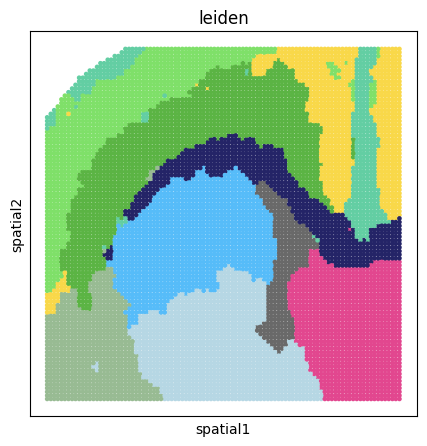

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plot_color=["#5BB444","#56BCF9","#B6D7E4","#E2478F","#7FE069","#F9D849",
        "#98BB93","#242467","#63CEA3","#696969"]
adata.obsm['spatial'][:, 1] = -1*adata.obsm['spatial'][:, 1]
sc.pl.embedding(adata, basis="spatial",
                color="leiden",
                s=45,
                show=True,
                palette=plot_color,legend_loc=None)

## Spatial-ATAC-seq

In [16]:
adata = sc.read_h5ad('/home/yuzhuohan/workspace/ATAC/our/code_rep/data/Tutorial1:platform-agnostic structural consistency/mousebrain/P21_Spatial_ATAC.h5ad')
adata.X[adata.X.nonzero()] = 1
adata.var_names_make_unique()
lsi(adata, use_highly_variable=False, n_components=201)
adata.obsm['feat'] = adata.obsm['X_lsi'].copy()

In [17]:
adata = construct_neighbor_graph(adata, loc_neighbors=7, gene_neighbors=2, com_neighbors=1)

In [18]:
model = SPHERE(adata, device=device, learning_rate=0.001, dim_output=64, epochs=1000,lambda_fea_recon=0.6,lambda_spa_recon=0.5,
               lambda_recon=1,lambda_con=1.5)

In [19]:
output = model.train()
adata.obsm['latent'] = output['latent']
adata.obsm['latent'] = pca(adata, use_reps='latent', n_comps=20)
sc.pp.neighbors(adata, use_rep='latent', n_neighbors=30)

100%|██████████| 1000/1000 [00:16<00:00, 62.08it/s]


Model training finished!



In [23]:
res = search_res(adata, 7, use_rep='latent', method='leiden', start=0.1, end=1.2, increment=0.01)
sc.tl.leiden(adata, random_state=0, resolution=res)

Searching resolution...
resolution=1.1899999999999995, cluster number=12
resolution=1.1799999999999995, cluster number=12
resolution=1.1699999999999995, cluster number=11
resolution=1.1599999999999995, cluster number=12
resolution=1.1499999999999995, cluster number=12
resolution=1.1399999999999997, cluster number=11
resolution=1.1299999999999997, cluster number=11
resolution=1.1199999999999997, cluster number=11
resolution=1.1099999999999997, cluster number=10
resolution=1.0999999999999996, cluster number=10
resolution=1.0899999999999996, cluster number=10
resolution=1.0799999999999996, cluster number=10
resolution=1.0699999999999996, cluster number=9
resolution=1.0599999999999996, cluster number=9
resolution=1.0499999999999996, cluster number=9
resolution=1.0399999999999996, cluster number=9
resolution=1.0299999999999996, cluster number=9
resolution=1.0199999999999996, cluster number=9
resolution=1.0099999999999996, cluster number=9
resolution=0.9999999999999996, cluster number=9
reso

/home/yuzhuohan/miniconda3/envs/SPHERE/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


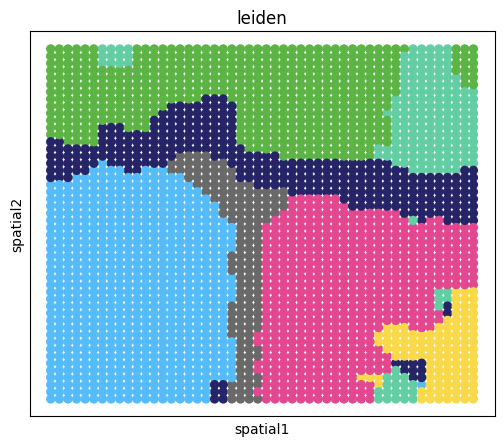

In [25]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 5)
plot_color=["#56BCF9","#E2478F","#5BB444","#242467","#63CEA3","#696969",
        "#F9D849"]
sc.pl.embedding(adata, basis="spatial",
                color="leiden",
                s=180,
                show=True,
                palette=plot_color,legend_loc=None)